## FEATURE ENGINEERING PART-1
#### HANDLING MISSING VALUES

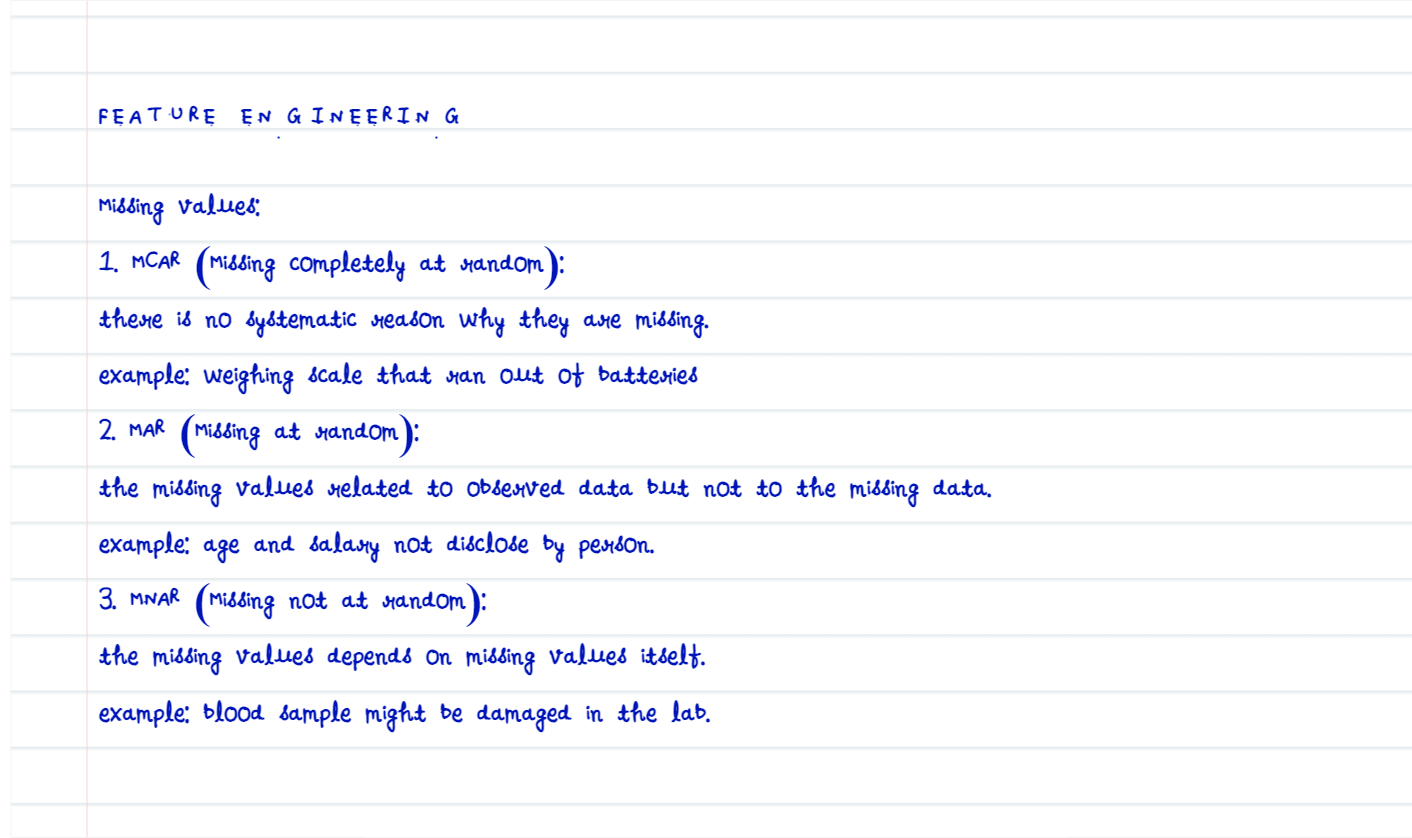

In [2]:
import seaborn as sns

In [4]:
# loading the dataset
df = sns.load_dataset('titanic')

In [5]:
# read the data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# check for missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

We can see in column age,embarked and deck we have missing values

#### Delete the rows or data point to handle missing values which can also lead loss of huge data.

In [7]:
# check for shape
df.shape

(891, 15)

In [9]:
# drop rows wise
df.dropna().shape

(182, 15)

We can see droping is not much good way to handle missing values because we are loosing data point.

In [10]:
# drop column wise
df.dropna(axis=1).shape

(891, 11)

Sometimes is ok to use column wise deletion that can also help us to solve the problem of missing values.

### IMPUTATION TECHNIQUES
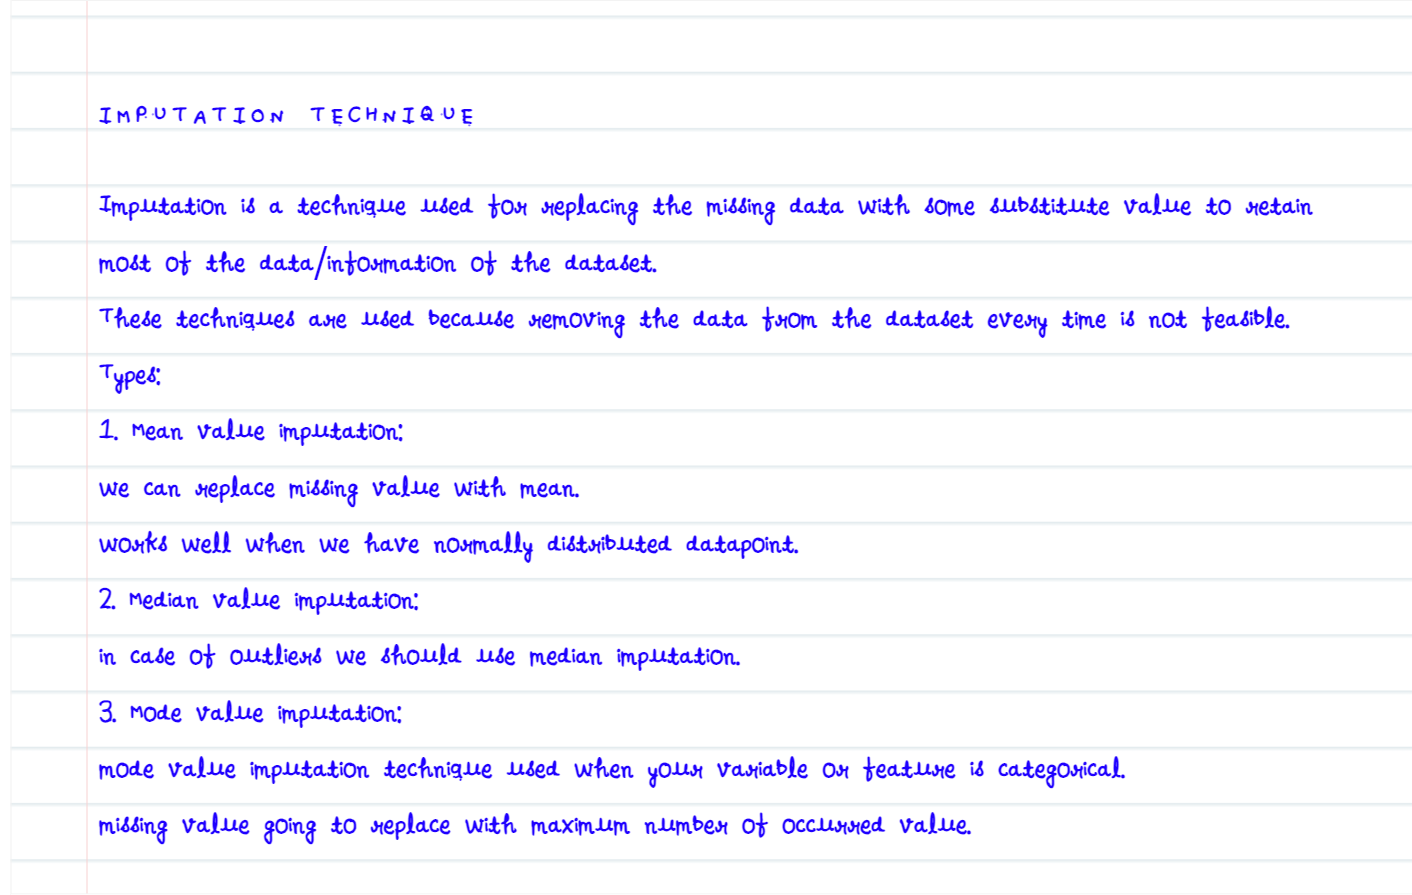

1. Mean Imputation

<AxesSubplot: xlabel='age', ylabel='Count'>

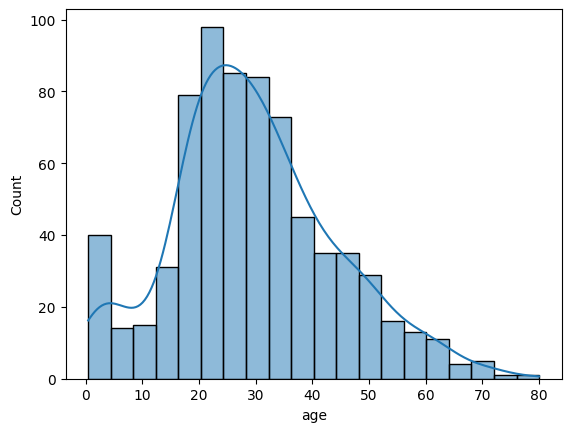

In [12]:
sns.histplot(df['age'],kde=True)

In [14]:
# handle missing value with mean
df['age'] = df['age'].fillna(df['age'].mean())

In [15]:
df['age'].isnull().sum()

0

We can see now there is no missing value in age column

2. Median Value Imputation

<AxesSubplot: >

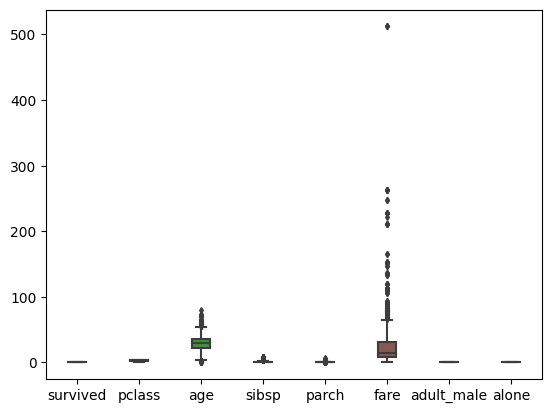

In [17]:
sns.boxplot(df,width=0.3,fliersize=3)

We can see we have outliers in fare and age column so we can use median imputation technique for mean because we have missing values in age not in fare.

In [24]:
# replace missing value with median
df['age'] = df['age'].fillna(df['age'].median())

3. Mode Value Imputation

In [29]:
# printing rows with null value
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [30]:
# check for unique value
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
# check max occured value
df['embarked'].mode()[0]

'S'

In [33]:
# replacing missing value with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [36]:
# check for null value
df['embarked'].isnull().sum()

0